<a href="https://colab.research.google.com/github/muralioleti/Sentiment-Analysis-Models-on-Synthetic-Social-Media/blob/main/NLP%20vs%20GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NLP code


Epoch 1/25
105/105 [==============================] - 283s 3s/step - loss: 1.0388 - accuracy: 0.4824 - val_loss: 0.9950 - val_accuracy: 0.5083
Epoch 2/25
105/105 [==============================] - 224s 2s/step - loss: 0.8846 - accuracy: 0.6098 - val_loss: 1.0003 - val_accuracy: 0.5095
Epoch 3/25
105/105 [==============================] - 213s 2s/step - loss: 0.7291 - accuracy: 0.7068 - val_loss: 0.9990 - val_accuracy: 0.5905
Epoch 4/25
105/105 [==============================] - 231s 2s/step - loss: 0.4866 - accuracy: 0.8241 - val_loss: 1.0383 - val_accuracy: 0.5798
Epoch 5/25
105/105 [==============================] - 226s 2s/step - loss: 0.3142 - accuracy: 0.8920 - val_loss: 1.3444 - val_accuracy: 0.5881
Epoch 6/25
105/105 [==============================] - 223s 2s/step - loss: 0.2254 - accuracy: 0.9253 - val_loss: 1.3571 - val_accuracy: 0.5667
Epoch 7/25
105/105 [==============================] - 243s 2s/step - loss: 0.1728 - accuracy: 0.9426 - val_loss: 1.6214 - val_accuracy: 0.5940

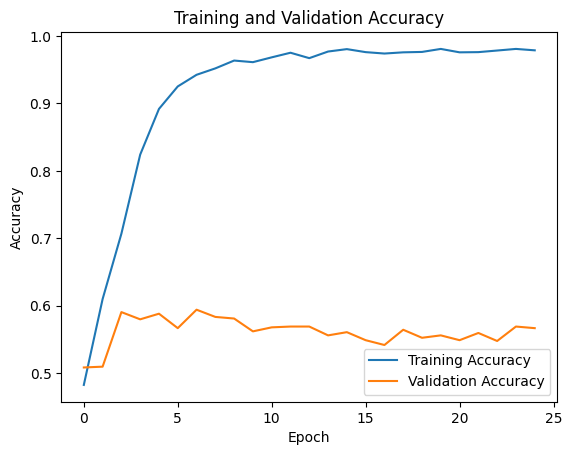

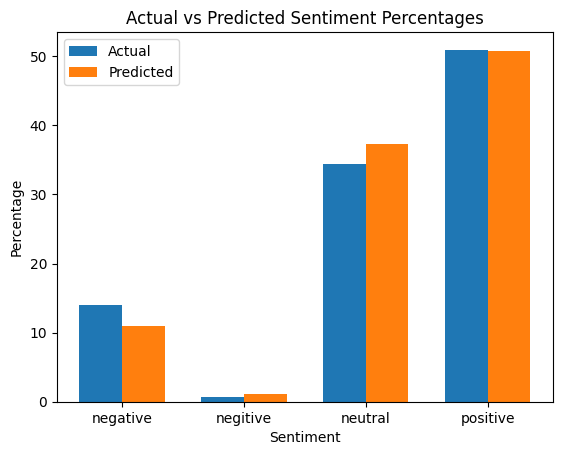

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load your sentiment analysis dataset
# Replace 'your_dataset.csv' with the actual file path to your dataset
dataset = pd.read_csv('/content/drive/MyDrive/foot_ulcer (stu) - DL/youtube_comments_coronavirus 2.csv')

# Assume your dataset has 'comment_text' column for comments and 'sentiment_type' column for sentiment
X = dataset['comment_text']
y = dataset['sentiment_type']

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # Adjust based on the length of your sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build an advanced LSTM model with increased complexity
model = Sequential()
model.add(Embedding(max_words, 300, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(300, return_sequences=True)))  # Increased LSTM units
model.add(Bidirectional(LSTM(150)))  # Increased LSTM units
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with increased complexity
epochs = 25  # Increase the number of epochs
history = model.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_test_padded, y_test))

# Evaluate using classification metrics
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot a bar graph comparing predicted and actual sentiment percentages
sentiments = label_encoder.classes_

# Calculate actual percentages
actual_percentages = [np.sum(y_true_classes == i) / len(y_true_classes) * 100 for i in range(len(sentiments))]

# Calculate predicted percentages
predicted_percentages = [np.sum(y_pred_classes == i) / len(y_pred_classes) * 100 for i in range(len(sentiments))]

# Plot the bar graph
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(sentiments)), actual_percentages, width, label='Actual')
bar2 = ax.bar(np.arange(len(sentiments)) + width, predicted_percentages, width, label='Predicted')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage')
ax.set_title('Actual vs Predicted Sentiment Percentages')
ax.set_xticks(np.arange(len(sentiments)) + width / 2)
ax.set_xticklabels(sentiments)
ax.legend()

plt.show()


GRU code

Epoch 1/25
105/105 [==============================] - 27s 66ms/step - loss: 1.1107 - accuracy: 0.4631 - val_loss: 0.9997 - val_accuracy: 0.5286
Epoch 2/25
105/105 [==============================] - 8s 73ms/step - loss: 0.9598 - accuracy: 0.5286 - val_loss: 0.9691 - val_accuracy: 0.5429
Epoch 3/25
105/105 [==============================] - 7s 68ms/step - loss: 0.7305 - accuracy: 0.7042 - val_loss: 1.0275 - val_accuracy: 0.5821
Epoch 4/25
105/105 [==============================] - 7s 67ms/step - loss: 0.4873 - accuracy: 0.8182 - val_loss: 1.1191 - val_accuracy: 0.5500
Epoch 5/25
105/105 [==============================] - 8s 72ms/step - loss: 0.3322 - accuracy: 0.8875 - val_loss: 1.3449 - val_accuracy: 0.5357
Epoch 6/25
105/105 [==============================] - 6s 61ms/step - loss: 0.2557 - accuracy: 0.9134 - val_loss: 1.6513 - val_accuracy: 0.5405
Epoch 7/25
105/105 [==============================] - 9s 82ms/step - loss: 0.1923 - accuracy: 0.9360 - val_loss: 1.8103 - val_accuracy: 0.559

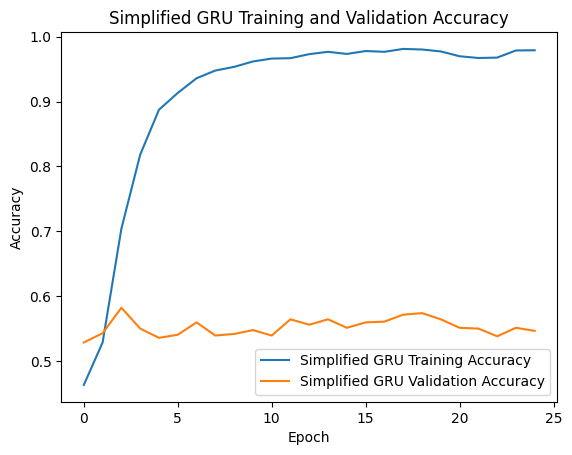

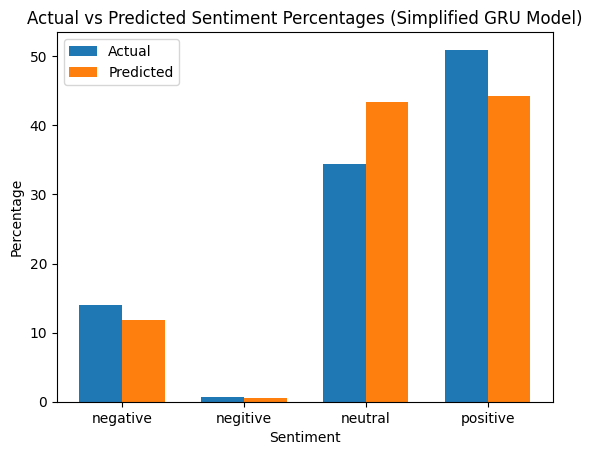

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load your sentiment analysis dataset
# Replace 'your_dataset.csv' with the actual file path to your dataset
dataset = pd.read_csv('/content/drive/MyDrive/foot_ulcer (stu) - DL/youtube_comments_coronavirus 2.csv')

# Assume your dataset has 'comment_text' column for comments and 'sentiment_type' column for sentiment
X = dataset['comment_text']
y = dataset['sentiment_type']

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # Adjust based on the length of your sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build a simplified GRU model with reduced complexity
gru_model = Sequential()
gru_model.add(Embedding(max_words, 100, input_length=max_sequence_length))  # Reduced embedding dimension
gru_model.add(GRU(50))  # Reduced number of units
gru_model.add(Dense(50, activation='relu'))  # Reduced number of units
gru_model.add(Dropout(0.5))  # Increased dropout rate
gru_model.add(Dense(4, activation='softmax'))

gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the simplified GRU model
gru_epochs = 25  # Adjust the number of epochs
gru_history = gru_model.fit(X_train_padded, y_train, epochs=gru_epochs, validation_data=(X_test_padded, y_test))

# Evaluate using classification metrics
gru_y_pred = gru_model.predict(X_test_padded)
gru_y_pred_classes = np.argmax(gru_y_pred, axis=1)

print("Simplified GRU Model:")
print(classification_report(np.argmax(y_test, axis=1), gru_y_pred_classes))

# Plot the accuracy over epochs for the simplified GRU model
plt.plot(gru_history.history['accuracy'], label='Simplified GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Simplified GRU Validation Accuracy')
plt.title('Simplified GRU Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot a bar graph comparing predicted and actual sentiment percentages for the simplified GRU model
sentiments = label_encoder.classes_

# Calculate actual percentages
actual_percentages = [np.sum(np.argmax(y_test, axis=1) == i) / len(y_test) * 100 for i in range(len(sentiments))]

# Calculate predicted percentages
predicted_percentages = [np.sum(gru_y_pred_classes == i) / len(gru_y_pred_classes) * 100 for i in range(len(sentiments))]

# Plot the bar graph for the simplified GRU model
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(sentiments)), actual_percentages, width, label='Actual')
bar2 = ax.bar(np.arange(len(sentiments)) + width, predicted_percentages, width, label='Predicted')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage')
ax.set_title('Actual vs Predicted Sentiment Percentages (Simplified GRU Model)')
ax.set_xticks(np.arange(len(sentiments)) + width / 2)
ax.set_xticklabels(sentiments)
ax.legend()
